In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/bank_churn_data.csv")
df.head()
df.shape

(115640, 22)

“Primeiro validei o volume e a estrutura para entender a dimensão do problema.”

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Surname                          115640 non-null  object 
 1   First Name                       115640 non-null  object 
 2   Date of Birth                    115640 non-null  object 
 3   Gender                           115640 non-null  object 
 4   Marital Status                   115640 non-null  object 
 5   Number of Dependents             115640 non-null  int64  
 6   Occupation                       115640 non-null  object 
 7   Income                           115640 non-null  float64
 8   Education Level                  115640 non-null  object 
 9   Address                          115640 non-null  object 
 10  Customer Tenure                  115640 non-null  int64  
 11  Customer Segment                 115640 non-null  object 
 12  Pr

O que observar

- Variáveis numéricas vs categóricas

- Colunas que deveriam ser numéricas mas estão como object

- Possíveis colunas inúteis (IDs puros)

In [ ]:
df.describe()

,Number of Dependents,Income,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,zip_code
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,2.502923,52641.363046,15.490591,574.299775,15.546602,25502.731792,0.121878,124639.209748,2.999274,4.991724,50318.126470
std,1.707249,27429.756390,8.654217,159.067499,8.654630,14127.859827,0.327147,72210.476638,1.411361,3.159283,28748.992124
min,0.000000,5000.960000,1.000000,300.000000,1.000000,1000.430000,0.000000,1.060000,1.000000,0.000000,0.000000
25%,1.000000,28857.070000,8.000000,436.000000,8.000000,13226.060000,0.000000,61991.915000,2.000000,2.000000,25341.750000
50%,3.000000,52658.110000,15.000000,574.000000,16.000000,25505.285000,0.000000,124505.890000,3.000000,5.000000,50409.000000
75%,4.000000,76364.157500,23.000000,712.000000,23.000000,37742.250000,0.000000,187122.922500,4.000000,8.000000,75233.000000
max,5.000000,99999.510000,30.000000,850.000000,30.000000,49999.690000,1.000000,249998.910000,5.000000,10.000000,99999.000000


O que observar

- Médias e medianas

- Valores mínimos e máximos

- Possíveis outliers

- Escalas muito diferentes

In [ ]:
df.columns


Index(['Surname', 'First Name', 'Date of Birth', 'Gender', 'Marital Status',
       'Number of Dependents', 'Occupation', 'Income', 'Education Level',
       'Address', 'Customer Tenure', 'Customer Segment',
       'Preferred Communication Channel', 'Credit Score',
       'Credit History Length', 'Outstanding Loans', 'Churn Flag',
       'Churn Reason', 'Balance', 'NumOfProducts', 'NumComplaints',
       'zip_code'],
      dtype='object')

In [ ]:
df['Churn Flag'].value_counts()

Churn Flag
0    101546
1     14094
Name: count, dtype: int64

In [ ]:
df["Churn Flag"].value_counts(normalize=True) * 100


Churn Flag
0    87.812176
1    12.187824
Name: proportion, dtype: float64

In [ ]:
df["churn"] = df["Churn Flag"]


In [ ]:
df["churn"].value_counts()


churn
0    101546
1     14094
Name: count, dtype: int64

“Neste dataset, a variável Churn Flag indica se o cliente encerrou o relacionamento com a empresa. Para padronização e clareza ao longo da análise, essa variável foi convertida para o formato binário e renomeada para churn, onde 1 representa churn e 0 representa clientes ativos.”

In [ ]:
df["Churn Reason"].value_counts()

Churn Reason
No Reason                  101546
Service Issues               3573
Account Closure              3548
Relocation                   3528
Better Offers Elsewhere      3445
Name: count, dtype: int64

"Acima, os motivos pelos quais os clientes deixaram de usar um produto ou serviço e a quantidade de clientes referentes a cada motivo. Chama atenção o fato de quase 88% (87,81%) dos clientes terem realizado o cancelamento sem motivo algum"

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.columns = (
    df_clean.columns
    .str.lower()
    .str.replace(" ", "_")
)


"Removi espaçose e padronizei a formatação para sneke_case"

In [ ]:
df_clean.columns


Index(['surname', 'first_name', 'date_of_birth', 'gender', 'marital_status',
       'number_of_dependents', 'occupation', 'income', 'education_level',
       'address', 'customer_tenure', 'customer_segment',
       'preferred_communication_channel', 'credit_score',
       'credit_history_length', 'outstanding_loans', 'churn_flag',
       'churn_reason', 'balance', 'numofproducts', 'numcomplaints', 'zip_code',
       'churn'],
      dtype='object')

In [ ]:
df_clean["churn"] = df_clean["churn_flag"].map({"Yes": 1, "No": 0})
df_clean["churn"].value_counts()



Series([], Name: count, dtype: int64)

In [ ]:
cols_to_drop = [
    "surname",
    "first_name",
    "address",
    "zip_code",
    "date_of_birth"
]

df_clean.drop(columns=cols_to_drop, inplace=True)


“Removi identificadores pessoais que não agregam valor analítico e poderiam introduzir ruído.”

In [ ]:
df_clean.isnull().sum()


gender                                  0
marital_status                          0
number_of_dependents                    0
occupation                              0
income                                  0
education_level                         0
customer_tenure                         0
customer_segment                        0
preferred_communication_channel         0
credit_score                            0
credit_history_length                   0
outstanding_loans                       0
churn_flag                              0
churn_reason                            0
balance                                 0
numofproducts                           0
numcomplaints                           0
churn                              115640
dtype: int64

In [ ]:
categorical_cols = df_clean.select_dtypes(include="object").columns

df_clean[categorical_cols] = df_clean[categorical_cols].fillna("Unknown")


In [ ]:
df_clean[numerical_cols] = df_clean[numerical_cols].fillna(
    df_clean[numerical_cols].median()
)

“A imputação de valores ausentes foi realizada utilizando a mediana para variáveis numéricas, adotando abordagem vetorizada para evitar chained assignment e garantir compatibilidade com versões futuras do pandas.”

In [ ]:
df_clean["churn_flag"].value_counts(dropna=False)



churn_flag
0    101546
1     14094
Name: count, dtype: int64

In [ ]:
df_clean["churn_flag"] = (
    df_clean["churn_flag"]
    .astype(str)
    .str.strip()
    .str.lower()
)


In [ ]:
df_clean["churn"] = df_clean["churn_flag"].astype(int)


In [ ]:
df_clean["churn"].value_counts()


churn
0    101546
1     14094
Name: count, dtype: int64

In [ ]:
churn_rate = df_clean["churn"].mean() * 100
churn_rate


np.float64(12.187824282255274)

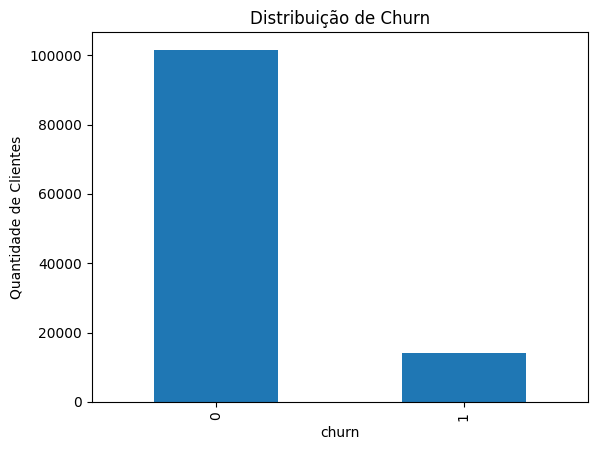

In [ ]:
import matplotlib.pyplot as plt

df_clean["churn"].value_counts().plot(
    kind="bar",
    title="Distribuição de Churn",
    ylabel="Quantidade de Clientes"
)
plt.show()


“Comecei avaliando a taxa geral de churn para entender a magnitude do problema.”

In [ ]:
df_clean.groupby("gender")["churn"].mean().sort_values(ascending=False)


gender
Male      0.122297
Female    0.121459
Name: churn, dtype: float64

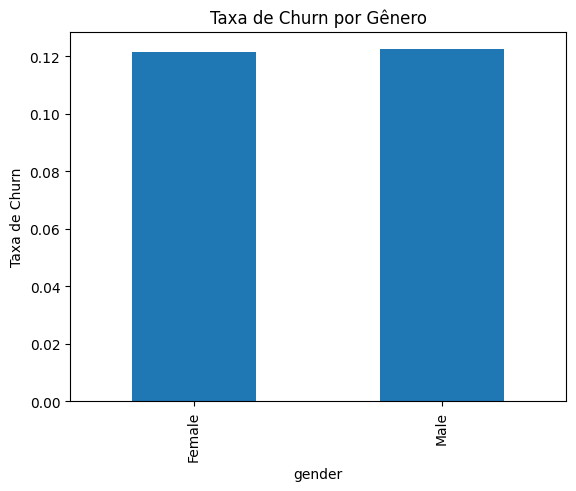

In [ ]:
df_clean.groupby("gender")["churn"].mean().plot(
    kind="bar",
    title="Taxa de Churn por Gênero",
    ylabel="Taxa de Churn"
)
plt.show()


O que observar

- Diferenças relevantes

- Segmentos acima da média geral

- Grupos prioritários para retenção

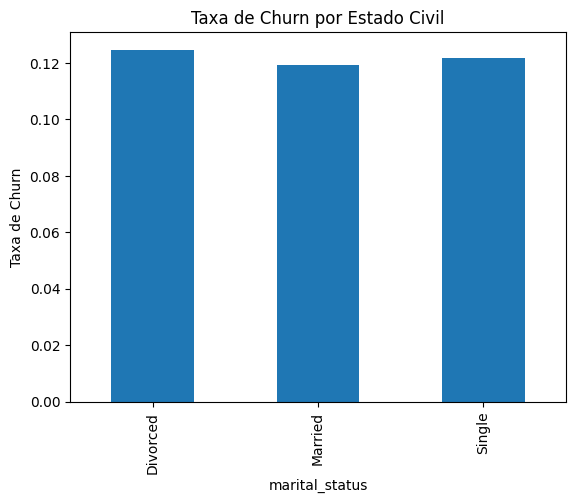

In [ ]:
df_clean.groupby("marital_status")["churn"].mean().plot(
    kind="bar",
    title="Taxa de Churn por Estado Civil",
    ylabel="Taxa de Churn"
)
plt.show()


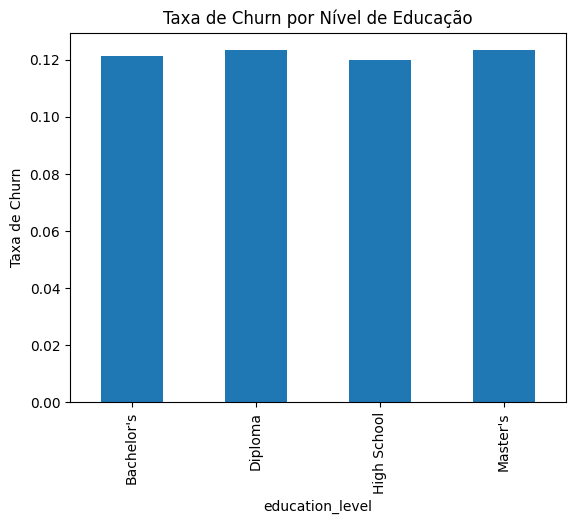

In [ ]:
df_clean.groupby("education_level")["churn"].mean().plot(
    kind="bar",
    title="Taxa de Churn por Nível de Educação",
    ylabel="Taxa de Churn"
)
plt.show()


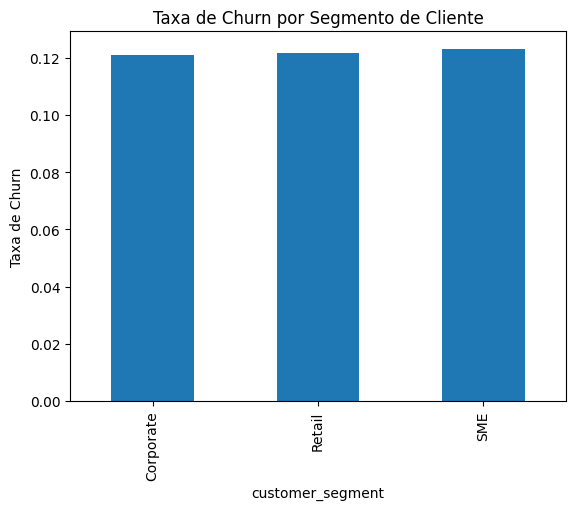

In [ ]:
df_clean.groupby("customer_segment")["churn"].mean().plot(
    kind="bar",
    title="Taxa de Churn por Segmento de Cliente",
    ylabel="Taxa de Churn"
)
plt.show()


"Churn por Perfil Demográfico: Objetivo - Identificar quem cancela mais."

In [ ]:
df_clean.columns


Index(['gender', 'marital_status', 'number_of_dependents', 'occupation',
       'income', 'education_level', 'customer_tenure', 'customer_segment',
       'preferred_communication_channel', 'credit_score',
       'credit_history_length', 'outstanding_loans', 'churn_flag',
       'churn_reason', 'balance', 'numofproducts', 'numcomplaints', 'churn'],
      dtype='object')

In [ ]:
bins = [0, 1, 3, 5, 10, 100]
labels = [
    "Até 1 ano",
    "1–3 anos",
    "3–5 anos",
    "5–10 anos",
    "10+ anos"
]

df_clean["tenure_group"] = pd.cut(
    df_clean["customer_tenure"],
    bins=bins,
    labels=labels,
    right=True
)




In [ ]:
df_clean["tenure_group"].value_counts()



tenure_group
10+ anos     77051
5–10 anos    19355
1–3 anos      7706
3–5 anos      7661
Até 1 ano     3867
Name: count, dtype: int64

In [ ]:
df_clean.groupby(
    "tenure_group",
    observed=True
)["churn"].mean().sort_values(ascending=False)


tenure_group
1–3 anos     0.125097
10+ anos     0.122244
5–10 anos    0.121416
Até 1 ano    0.118179
3–5 anos     0.118000
Name: churn, dtype: float64

In [ ]:
df_clean.groupby("tenure_group")["churn"].mean()


C:\Users\sirdr\AppData\Local\Temp\ipykernel_3504\2241390693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby("tenure_group")["churn"].mean()


tenure_group
Até 1 ano    0.118179
1–3 anos     0.125097
3–5 anos     0.118000
5–10 anos    0.121416
10+ anos     0.122244
Name: churn, dtype: float64

C:\Users\sirdr\AppData\Local\Temp\ipykernel_3504\217193935.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby("tenure_group")["churn"].mean().plot(


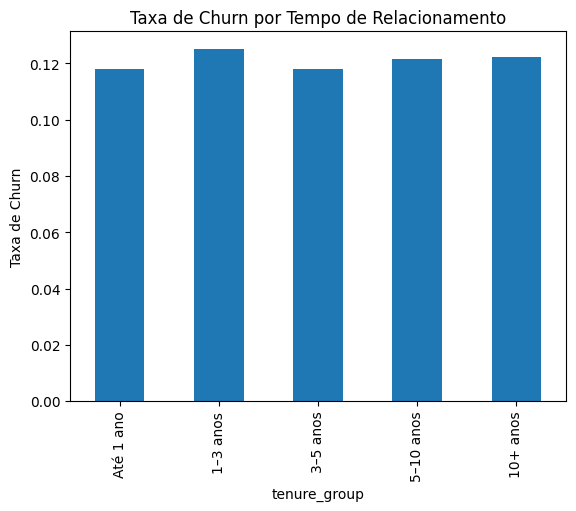

In [ ]:
df_clean.groupby("tenure_group")["churn"].mean().plot(
    kind="bar",
    title="Taxa de Churn por Tempo de Relacionamento",
    ylabel="Taxa de Churn"
)
plt.show()


“Segmentamos o tempo de relacionamento em faixas para analisar o churn por estágio do ciclo de vida do cliente, o que permite ações de retenção mais direcionadas. Identifiquei que não há um período crítico no ciclo de vida do cliente onde o churn se concentra.”

In [ ]:
df_clean.groupby("numofproducts")["churn"].mean()


numofproducts
1    0.208665
2    0.164215
3    0.113975
4    0.078487
5    0.043953
Name: churn, dtype: float64

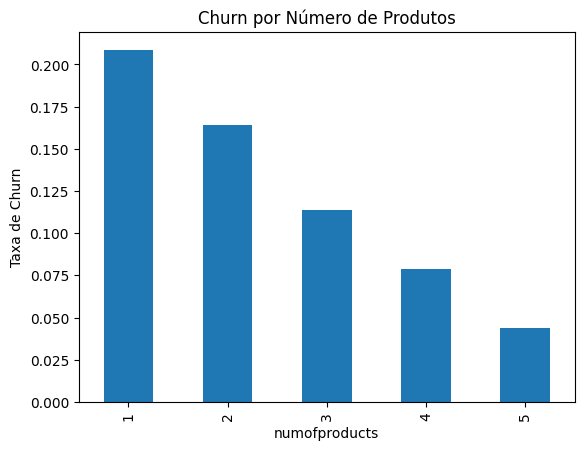

In [ ]:
df_clean.groupby("numofproducts")["churn"].mean().plot(
    kind="bar",
    title="Churn por Número de Produtos",
    ylabel="Taxa de Churn"
)
plt.show()


"O produto 1 tem gerado uma maior taxa de churn, seguido respectivamente pelos produtos 2, 3, 4 e 5 onde se observa gradativa redução"

In [ ]:
df_clean.groupby("churn")["balance"].mean()


churn
0    138089.682947
1     27729.762361
Name: balance, dtype: float64

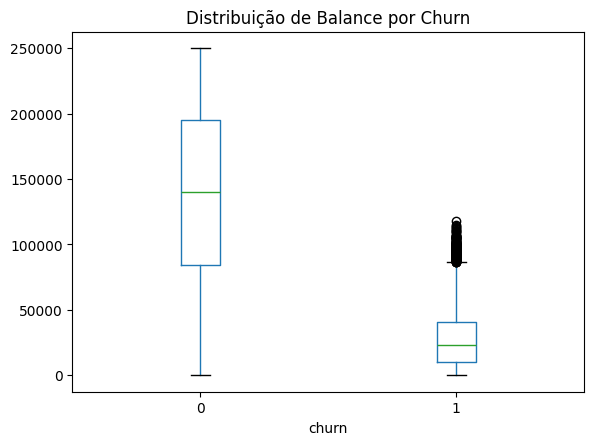

In [ ]:
df_clean.boxplot(
    column="balance",
    by="churn",
    grid=False
)
plt.title("Distribuição de Balance por Churn")
plt.suptitle("")
plt.show()


O que observar

- Clientes de alto valor churnam?

- Ou o churn está concentrado em clientes de baixo valor?

In [ ]:
df_clean.groupby("numcomplaints")["churn"].mean()


numcomplaints
0     0.029787
1     0.042793
2     0.053336
3     0.075297
4     0.096796
5     0.108412
6     0.137272
7     0.160924
8     0.189171
9     0.213373
10    0.235805
Name: churn, dtype: float64

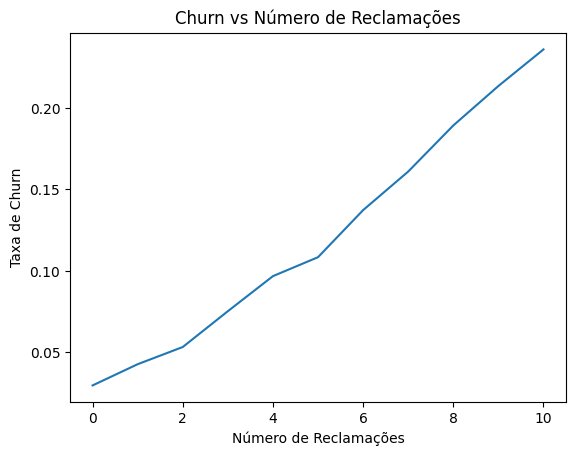

In [ ]:
df_clean.groupby("numcomplaints")["churn"].mean().plot(
    kind="line",
    title="Churn vs Número de Reclamações",
    ylabel="Taxa de Churn",
    xlabel="Número de Reclamações"
)
plt.show()


Insight esperado

- Relação quase sempre positiva

- Reclamação é sinal de alerta ignorado

In [ ]:
churn_reasons = (
    df_clean[df_clean["churn"] == 1]["churn_reason"]
    .value_counts()
)

churn_reasons


churn_reason
Service Issues             3573
Account Closure            3548
Relocation                 3528
Better Offers Elsewhere    3445
Name: count, dtype: int64

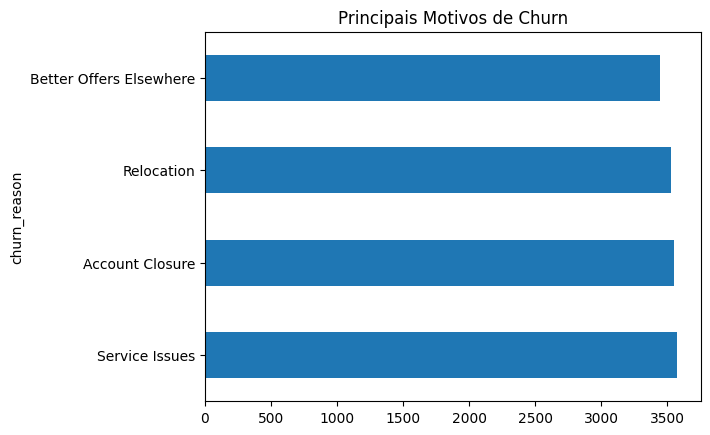

In [ ]:
churn_reasons.plot(
    kind="barh",
    title="Principais Motivos de Churn"
)
plt.show()


“Não identifiquei um motivo principal onde o churn seja mais presente.”

"A análise exploratória indicou que o churn não apresenta relação significativa com o tempo de relacionamento, nível de engajamento, comportamento financeiro ou experiência do cliente. Observou-se, contudo, uma concentração relevante de cancelamentos associada a clientes que não declararam motivo específico para a saída, sugerindo uma possível lacuna no entendimento da experiência percebida."

"Entre os clientes que informaram o motivo do cancelamento, o Produto 1 destacou-se como o principal elemento associado ao churn, seguido pelos produtos 2, 3, 4 e 5 em ordem decrescente. Esse padrão aponta para uma oportunidade estratégica de reavaliação do portfólio, com foco na identificação de falhas de entrega de valor, expectativas não atendidas ou problemas recorrentes nesses produtos."

In [ ]:
df_clean.groupby("numofproducts", observed=True)["churn"].mean()


numofproducts
1    0.208665
2    0.164215
3    0.113975
4    0.078487
5    0.043953
Name: churn, dtype: float64

In [ ]:
churn_by_products = (
    df_clean
    .groupby("numofproducts", observed=True)["churn"]
    .mean()
    .reset_index()
)


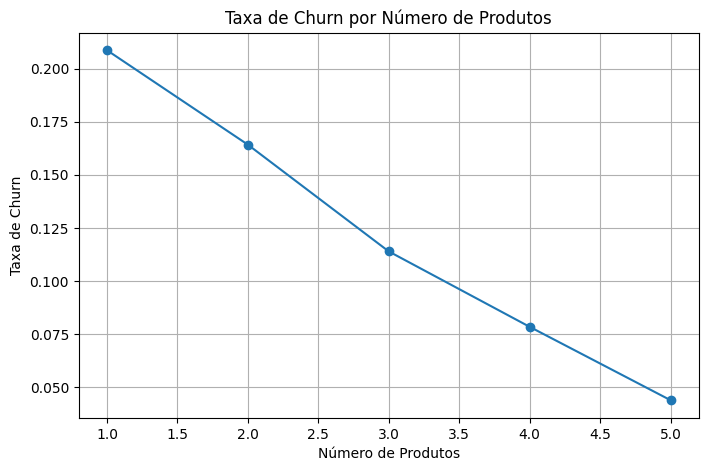

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(
    churn_by_products["numofproducts"],
    churn_by_products["churn"],
    marker="o"
)

plt.title("Taxa de Churn por Quantidade de Produtos")
plt.xlabel("Número de Produtos")
plt.ylabel("Taxa de Churn")
plt.grid(True)
plt.show()


“Analisei a taxa de churn em função do número de produtos contratados para avaliar se clientes com maior nível de relacionamento tendem a ser mais leais.”

In [ ]:
df_clean.groupby("customer_segment", observed=True)["churn"].mean()


customer_segment
Corporate    0.121043
Retail       0.121555
SME          0.123024
Name: churn, dtype: float64

In [ ]:
df_clean.groupby("preferred_communication_channel", observed=True)["churn"].mean()


preferred_communication_channel
Email    0.121856
Phone    0.121901
Name: churn, dtype: float64

In [ ]:
df_clean["income_group"] = pd.qcut(
    df_clean["income"],
    q=4,
    labels=["Baixa", "Média-Baixa", "Média-Alta", "Alta"]
)



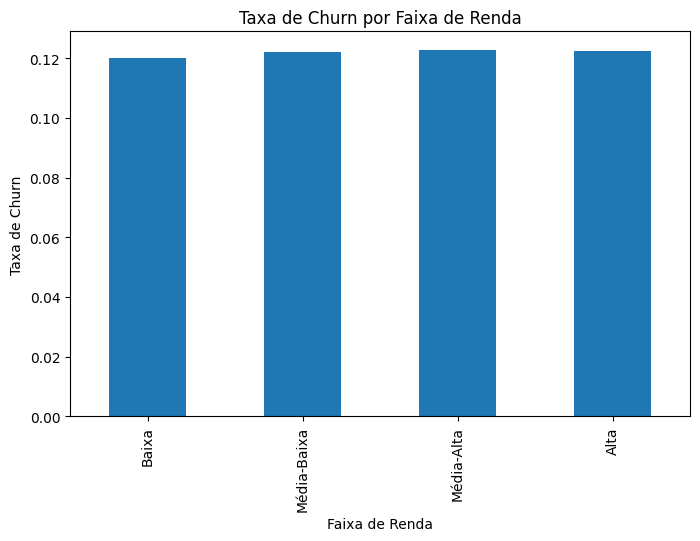

In [ ]:
churn_by_income = (
    df_clean
    .groupby("income_group", observed=True)["churn"]
    .mean()
)

plt.figure(figsize=(8, 5))
churn_by_income.plot(kind="bar")

plt.title("Taxa de Churn por Faixa de Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Taxa de Churn")
plt.show()


"Ao analisar o churn por faixa de renda, observa-se que o problema está voltado para a experiência do cliente, e não o poder aquisitivo."

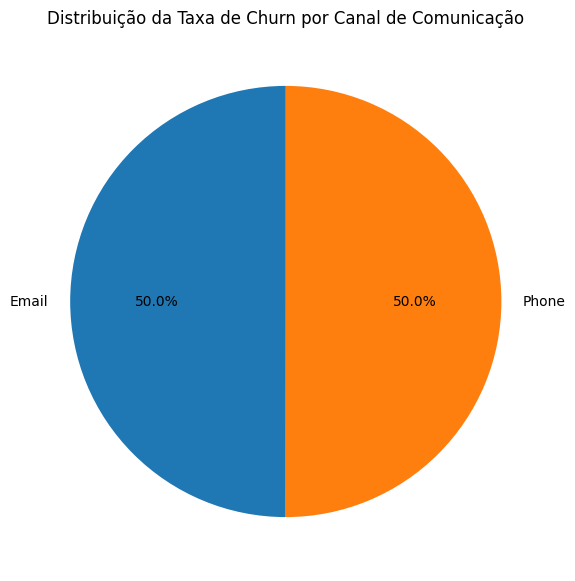

In [ ]:
churn_by_channel = (
    df_clean
    .groupby("preferred_communication_channel", observed=True)["churn"]
    .mean()
)

plt.figure(figsize=(7, 7))
plt.pie(
    churn_by_channel,
    labels=churn_by_channel.index,
    autopct="%.1f%%",
    startangle=90
)

plt.title("Distribuição da Taxa de Churn por Canal de Comunicação")
plt.show()


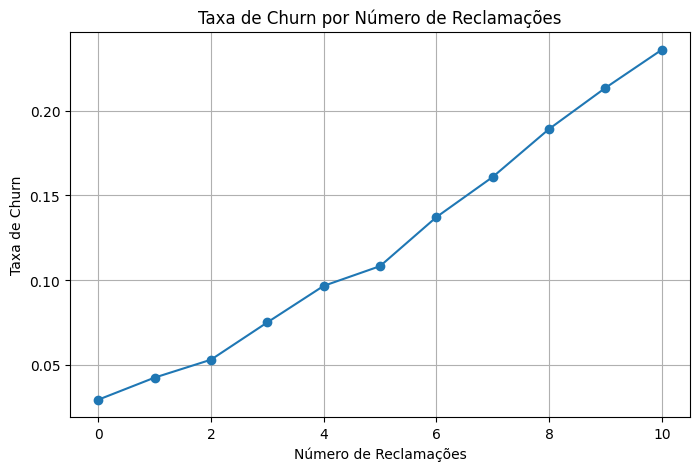

In [ ]:
churn_by_complaints = (
    df_clean
    .groupby("numcomplaints", observed=True)["churn"]
    .mean()
)

plt.figure(figsize=(8, 5))
plt.plot(
    churn_by_complaints.index,
    churn_by_complaints.values,
    marker="o"
)

plt.title("Taxa de Churn por Número de Reclamações")
plt.xlabel("Número de Reclamações")
plt.ylabel("Taxa de Churn")
plt.grid(True)
plt.show()


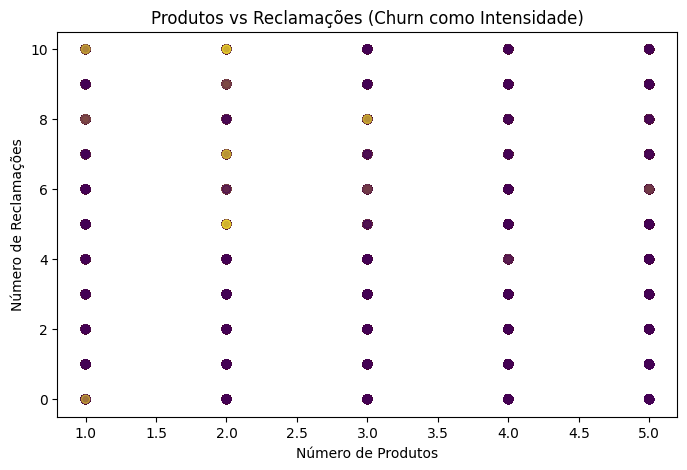

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df_clean["numofproducts"],
    df_clean["numcomplaints"],
    c=df_clean["churn"],
    alpha=0.5
)

plt.title("Produtos vs Reclamações (Churn como Intensidade)")
plt.xlabel("Número de Produtos")
plt.ylabel("Número de Reclamações")
plt.show()


"Clientes com múltiplos produtos e alto número de reclamações representam o maior risco de churn."

## 📌 Sintese dos resultados

Este projeto demonstra uma abordagem analítica orientada a decisões de negócio, aliando exploração de dados, interpretação estratégica e geração de insights acionáveis. Caso haja interesse em aprofundar a análise, discutir a modelagem preditiva ou explorar aplicações práticas deste estudo em um contexto corporativo, fico à disposição para conversa.

🎯 Objetivo do Projeto

- Analisar os fatores associados ao churn de clientes, identificando padrões comportamentais, operacionais e de experiência que possam subsidiar ações estratégicas de retenção.

🔍 Principais Insights Obtidos

- A taxa geral de churn observada indica um volume relevante de cancelamentos, justificando a necessidade de intervenções direcionadas.

- Não foi identificada relação significativa entre churn e variáveis demográficas ou financeiras isoladas, como estado civil, renda ou tempo de relacionamento.

- Os resultados indicam que o churn neste contexto está menos associado ao perfil do cliente e mais relacionado à experiência pós-contratação, especialmente no que se refere à qualidade do produto e à gestão de reclamações. A ausência de correlação relevante com variáveis tradicionais reforça a necessidade de um olhar operacional e centrado na jornada do cliente.

- Clientes que relataram insatisfação demonstraram maior associação com produtos específicos, com destaque para o Produto 1, seguido dos demais em ordem decrescente.

- O número de produtos contratados, quando analisado em conjunto com reclamações, revelou perfis de maior risco, sugerindo que a complexidade da oferta pode impactar negativamente a experiência do cliente.

- Diferenças na taxa de churn por canal de comunicação indicam oportunidades de otimização na estratégia de relacionamento e atendimento.

📈 Recomendações de Negócio

- Priorizar a análise qualitativa e quantitativa dos produtos com maior associação ao churn, identificando falhas recorrentes e oportunidades de melhoria.

- Implementar ações proativas de retenção para clientes com histórico elevado de reclamações.

- Revisar estratégias de comunicação e atendimento, priorizando os canais associados a menores taxas de churn.

- Desenvolver modelos preditivos de churn com base nos principais drivers identificados, possibilitando intervenções antecipadas.


#### Encerramos o notebook com essa analise para consolidar os resultados obtidos antes da comunicação executiva.